## Project Description

The company “Cheten’koe Taxi” has collected historical data on taxi orders at airports. To attract more drivers during peak demand periods, it is necessary to predict the number of taxi orders for the next hour.
Your task is to build a model for this prediction.

The value of the RMSE metric on the test set must not exceed 48.

### Project Instructions

1. Load the data and resample it to one-hour intervals.
2. Analyze the data.
3. Train several models with different hyperparameters. Use a test set that is 10% of the original data.
4. Evaluate the models on the test set and draw conclusions.

### Data Description

The data is stored in the file 'taxi.csv'.
The number of orders is located in the column num_orders (short for number of orders).

# 1. Data Preparation

In [1209]:
import pandas as pd
data = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/datasets/taxi.csv')
data

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


In [1210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null object
num_orders    26496 non-null int64
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [1211]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [1212]:
df = data.copy()

# 2. Exploratory Data Analysis

In [1213]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null datetime64[ns]
num_orders    26496 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


In [1214]:
data = data.set_index('datetime')

In [1215]:
data.sort_index(inplace=True)
print(data.index.is_monotonic)

True


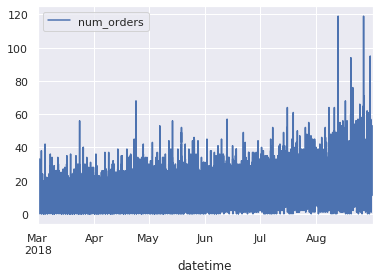

In [1216]:
data = data['2018-03':'2018-08']
data.plot();

In [1217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
num_orders    26496 non-null int64
dtypes: int64(1)
memory usage: 414.0 KB


In [1218]:
data = data.resample('1H').sum()
data.head(48)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
2018-03-01 05:00:00,6
2018-03-01 06:00:00,12
2018-03-01 07:00:00,15
2018-03-01 08:00:00,34


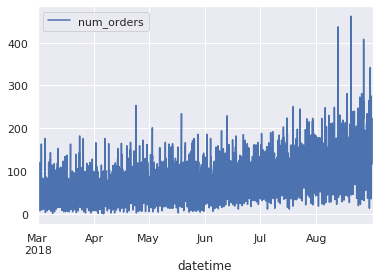

In [1219]:
data.plot();

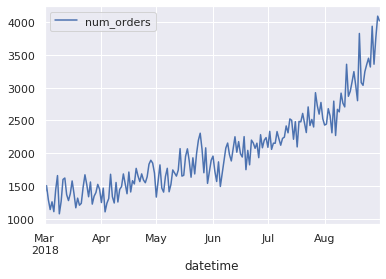

In [1220]:
data_day = data.resample('1D').sum()
data_day.plot();

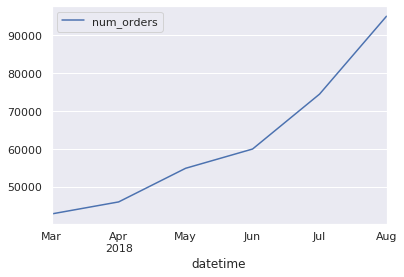

In [1221]:
data_month = data.resample('1M').sum()
data_month.plot();

In [1222]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [1223]:
decomposed = seasonal_decompose(data)

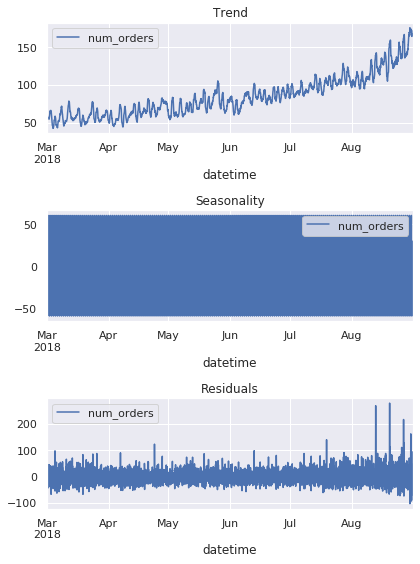

In [1224]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

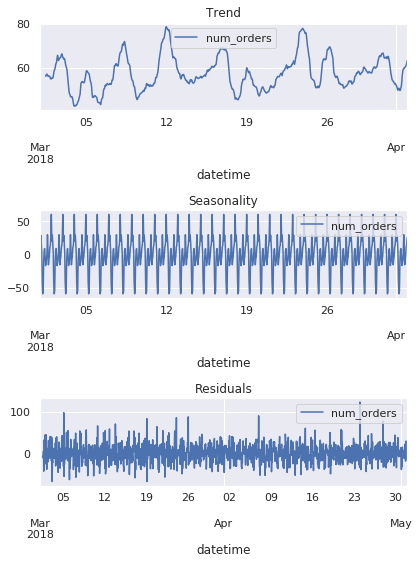

In [1225]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend['2018-03-01':'2018-04-1'].plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01':'2018-04-1'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid['2018-03-01':'2018-05-1'].plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

In [1226]:
df_one_month = data.copy()

In [1227]:
df_one_month= df_one_month['2018-03':'2018-08'].resample('1D').sum()

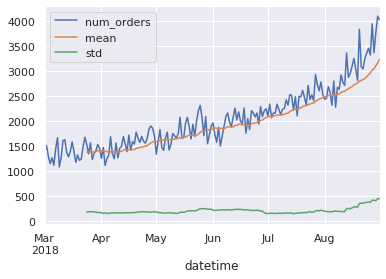

In [1228]:
df_one_month['mean'] = df_one_month['num_orders'].rolling(24).mean()
df_one_month['std'] = df_one_month['num_orders'].rolling(24).std()
df_one_month.plot();

#### <Font color="green"> Conclusion:
I performed resampling by hours, days, and months to better examine the time series. Then, I analyzed the trend and seasonality over the entire time period as well as over a two-month interval. I also examined the rolling mean and rolling standard deviation.
Based on the plots, I can draw the following conclusions: the time series is stochastic and non-stationary, since changes in the mean are observed in the trend, while the standard deviation remains stable. The seasonality shows a fairly regular cyclic pattern.
Since the data covers only half a year,  trends and seasonality depend on the scale of the data, it is not possible to fully identify yearly or longer-term patterns.

# 3. Model Training

In [1229]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [1230]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift(1).rolling(rolling_mean_size).mean()
make_features(data, 24, 24)

In [1231]:
data

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,207.0,217.0,197.0,116.0,133.0,...,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,72.0,164.875000
2018-08-31 20:00:00,154,2018,8,31,4,136.0,207.0,217.0,197.0,116.0,...,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,167.541667
2018-08-31 21:00:00,159,2018,8,31,4,154.0,136.0,207.0,217.0,197.0,...,78.0,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,168.041667


In [1232]:
data.fillna(0, inplace=True)

In [1233]:
data

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2018-03-01 01:00:00,85,2018,3,1,3,124.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,207.0,217.0,197.0,116.0,133.0,...,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,72.0,164.875000
2018-08-31 20:00:00,154,2018,8,31,4,136.0,207.0,217.0,197.0,116.0,...,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,142.0,167.541667
2018-08-31 21:00:00,159,2018,8,31,4,154.0,136.0,207.0,217.0,197.0,...,78.0,268.0,99.0,230.0,194.0,276.0,246.0,158.0,198.0,168.041667


In [1234]:
df_rolling = data.copy()

In [1235]:
df_rolling_month = df_rolling['2018-03':'2018-08'].resample('1M').sum()

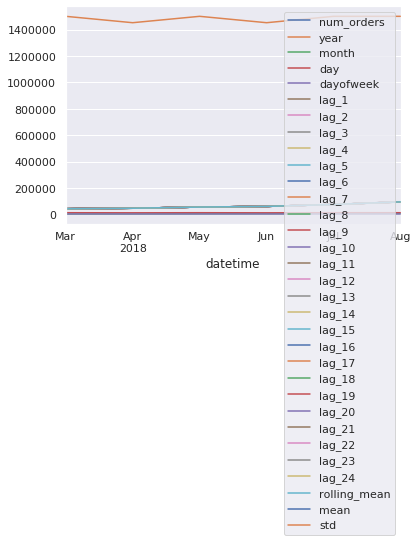

In [1236]:
df_rolling_month['mean'] = df_rolling_month['num_orders'].rolling(24).mean()
df_rolling_month['std'] = df_rolling_month['num_orders'].rolling(24).std()
df_rolling_month.plot();

In [1237]:
y = data['num_orders']
X = data.drop('num_orders', axis=1)

##### I split the dataset into training, validation, and test sets. Since the task requires the test set to be 10% of the data, I also tried to keep the validation set at 10%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=False, test_size=0.1111, random_state=1)

In [1239]:
print(X_train.index.min(), X_train.index.max())
print(X_val.index.min(), X_val.index.max())
print(X_test.index.min(), X_test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [1240]:
print(X_train.shape, X_test.shape, X_val.shape,y_train.shape, y_test.shape, y_val.shape)

(3532, 29) (442, 29) (442, 29) (3532,) (442,) (442,)


In [1241]:
def rmse(model_type, x_train, y_train, x_valid, y_valid):
    if model_type == 'linear':
        model = LinearRegression()
    if model_type == "xgb":
        model = xgb.XGBRegressor(learning_rate = 1, max_depth = 5,shuffle=False, n_estimators = 40,silent=True)
    if model_type == "lgb":
        model = lgb.LGBMRegressor(num_leaves=31,learning_rate=1, shuffle=False,n_estimators=40)
    if model_type == "cat":
        model = CatBoostRegressor(iterations=200,loss_function='RMSE',task_type="CPU",learning_rate=1,depth=5,verbose=40)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_val) 
    
    RMSE = mean_squared_error(y_val, y_pred) ** 0.5
    return {f"RMSE_{model_type}": RMSE}

In [1242]:
linear = rmse("linear",X_train,y_train,X_val, y_val)
linear

{'RMSE_linear': 34.08570604064053}

In [1243]:
RMSEs_xgb = rmse("xgb",X_train,y_train,X_val, y_val)
RMSEs_xgb

{'RMSE_xgb': 42.98089330677443}

In [1244]:
RMSEs_lgb = rmse("lgb",X_train,y_train,X_val, y_val)
RMSEs_lgb

{'RMSE_lgb': 44.882928898090675}

In [1245]:
RMSEs_cat = rmse("cat",X_train,y_train,X_val, y_val)
RMSEs_cat

0:	learn: 26.4349249	total: 73.5ms	remaining: 14.6s
40:	learn: 15.6359733	total: 914ms	remaining: 3.54s
80:	learn: 11.2740337	total: 1.76s	remaining: 2.58s
120:	learn: 8.6303927	total: 2.6s	remaining: 1.7s
160:	learn: 6.5297898	total: 3.37s	remaining: 816ms
199:	learn: 4.9539958	total: 4.2s	remaining: 0us


{'RMSE_cat': 41.22627208203387}

### Hyperparameter tuning using GridSearchCV

In [1246]:
xgb_boost = xgb.XGBRegressor(silent=True, nthread=1) 
params =  {'depth' : [3,5],
           'learning_rate': [0.1, 1],
            'n_estimators': [20, 40]
            }

In [1247]:
xgb_b = GridSearchCV(xgb_boost, params, cv=3)

In [1248]:
%%time
xgb_b.fit(X_train, y_train)

CPU times: user 2.97 s, sys: 0 ns, total: 2.97 s
Wall time: 2.98 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=1,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'depth': [3, 5], 'learning_rate': [0.1, 1],
                         'n_estimators': [20, 40]},
    

In [1249]:
print('Best parameters found by grid search is:', xgb_b.best_params_)

Best parameters found by grid search is: {'depth': 3, 'learning_rate': 0.1, 'n_estimators': 40}


In [1250]:
%%time
y_predict = xgb_b.predict(X_val) 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.61 ms


In [1251]:
rmse_xgb = mean_squared_error(y_val, y_predict) ** 0.5
rmse_xgb

36.93898391341

In [1252]:
estimator = lgb.LGBMRegressor()

In [1253]:
param_grid = {'num_leaves': [6,8],
             'learning_rate': [0.1, 1],
             'n_estimators': [20, 40]
              }

In [1254]:
gbm = GridSearchCV(estimator, param_grid, cv=3)

In [1255]:
%%time
gbm.fit(X_train, y_train)

CPU times: user 1.68 s, sys: 12 ms, total: 1.69 s
Wall time: 1.69 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.1, 1], 'n_estimators': [20, 40],
                         'num_leaves': [6, 8]},
             pre_dispatch='2*n_jobs', refit=

In [1256]:
print('Best parameters found by grid search is:', gbm.best_params_)

Best parameters found by grid search is: {'learning_rate': 0.1, 'n_estimators': 40, 'num_leaves': 8}


In [1257]:
%%time
y_predic = gbm.predict(X_val) 

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 10.3 ms


In [1258]:
rmse_Lgb = mean_squared_error(y_val, y_predic) ** 0.5
rmse_Lgb

35.63573496082445

In [1259]:
model = CatBoostRegressor()
parameters = {'depth'         : [3,5],
              'learning_rate' : [0.1,1],
              'iterations'    : [150,200]
                 }

In [1260]:
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 3)

In [1261]:
%%time
grid.fit(X_train, y_train,verbose=100)

0:	learn: 34.6669356	total: 4.34ms	remaining: 647ms
100:	learn: 22.4401172	total: 982ms	remaining: 476ms
149:	learn: 21.2195588	total: 1.51s	remaining: 0us
0:	learn: 35.0645160	total: 48.8ms	remaining: 7.28s
100:	learn: 21.7141312	total: 1.02s	remaining: 496ms
149:	learn: 20.6246065	total: 1.47s	remaining: 0us
0:	learn: 31.5410268	total: 93.1ms	remaining: 13.9s
100:	learn: 19.2193296	total: 983ms	remaining: 477ms
149:	learn: 18.3556381	total: 1.42s	remaining: 0us
0:	learn: 29.2798190	total: 1.42ms	remaining: 211ms
100:	learn: 14.7658661	total: 947ms	remaining: 459ms
149:	learn: 11.9475976	total: 1.39s	remaining: 0us
0:	learn: 28.5072245	total: 1.36ms	remaining: 202ms
100:	learn: 13.8164037	total: 886ms	remaining: 430ms
149:	learn: 11.1041271	total: 1.33s	remaining: 0us
0:	learn: 25.3561678	total: 1.35ms	remaining: 201ms
100:	learn: 12.3285220	total: 1.13s	remaining: 547ms
149:	learn: 10.1733844	total: 1.65s	remaining: 0us
0:	learn: 34.6669356	total: 2.75ms	remaining: 548ms
100:	learn: 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f232e60b050>,
             iid='warn', n_jobs=None,
             param_grid={'depth': [3, 5], 'iterations': [150, 200],
                         'learning_rate': [0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1262]:
print('Best parameters found by grid search is:',grid.best_params_)

Best parameters found by grid search is: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}


In [1263]:
%%time
y_preds = grid.predict(X_val) 

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 2.86 ms


In [1264]:
rmse_cats = mean_squared_error(y_val, y_preds) ** 0.5
rmse_cats 

33.00387895162433

# 4. Testing

In [1265]:
def rmse(model_type, x_train, y_train, x_test, y_test):
    if model_type == "linear":
        model = LinearRegression()
    if model_type == "xgb":
        model = xgb.XGBRegressor(learning_rate = 0.1, random_state=12345, max_depth = 3, n_estimators = 40,silent=True)
    if model_type == "lgb":
        model = lgb.LGBMRegressor(random_state=12345, learning_rate=0.1,num_leaves=8, n_estimators=40)
    if model_type == "cat":
        model = CatBoostRegressor(iterations=200,random_state=12345, loss_function='RMSE',task_type="CPU",learning_rate=0.1,depth=5,verbose=50)
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test) 
    
    RMSE = (mean_squared_error(y_test, y_pred) ** 0.5).round(0)
    return {f"RMSE_{model_type}": RMSE}

In [1266]:
RMSEs_linear = rmse("linear",X_train,y_train,X_test, y_test)
RMSEs_linear

{'RMSE_linear': 46.0}

In [1267]:
RMSEs_xgb = rmse("xgb",X_train,y_train,X_test, y_test)
RMSEs_xgb

{'RMSE_xgb': 56.0}

In [1268]:
RMSEs_lgb = rmse("lgb",X_train,y_train,X_test, y_test)
RMSEs_lgb

{'RMSE_lgb': 55.0}

In [1269]:
RMSEs_cat = rmse("cat",X_train,y_train,X_test, y_test)
RMSEs_cat

0:	learn: 34.2805034	total: 2.53ms	remaining: 503ms
50:	learn: 21.7163958	total: 982ms	remaining: 2.87s
100:	learn: 19.7753858	total: 1.92s	remaining: 1.89s
150:	learn: 18.4082803	total: 2.94s	remaining: 954ms
199:	learn: 17.1034302	total: 3.97s	remaining: 0us


{'RMSE_cat': 50.0}

In [1270]:
values = [RMSEs_linear,RMSEs_xgb,RMSEs_lgb,RMSEs_cat]
values

[{'RMSE_linear': 46.0},
 {'RMSE_xgb': 56.0},
 {'RMSE_lgb': 55.0},
 {'RMSE_cat': 50.0}]

In [1271]:
keys = ['RMSE_linear','RMSE_xgb', 'RMSE_lgb', 'RMSE_cat']
items = []
for i, item in enumerate(keys):
    items.append(values[i][item])

In [1272]:
rmse_val = pd.DataFrame(list(zip(keys, items)),columns=['Model','RMSE']) 
rmse_val

,Model,RMSE
0,RMSE_linear,46.0
1,RMSE_xgb,56.0
2,RMSE_lgb,55.0
3,RMSE_cat,50.0


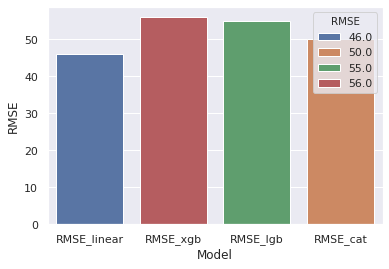

In [1273]:
ax = sns.barplot(x="Model", y="RMSE", hue="RMSE",dodge=False, data=rmse_val)
sns.set()

##### Conclusion: Linear Regression achieved the lowest RMSE value on the test set compared to the other models.

In [1274]:
df = df.dropna()

In [1275]:
from fbprophet import Prophet

In [1276]:
df

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


In [1277]:
df['ds'] = df['datetime']
df['y'] = df['num_orders']

In [1278]:
prophet = Prophet(yearly_seasonality=False)

In [1279]:
prophet.fit(df)

In [1280]:
future = prophet.make_future_dataframe(periods=1)

In [1281]:
prophet.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-01 00:00:00,9.085244,6.564052,24.037134,9.085244,9.085244,6.205097,6.205097,6.205097,5.755720,5.755720,5.755720,0.449377,0.449377,0.449377,0.0,0.0,0.0,15.290341
1,2018-03-01 00:10:00,9.085502,6.054802,23.433937,9.085502,9.085502,6.273606,6.273606,6.273606,5.836533,5.836533,5.836533,0.437072,0.437072,0.437072,0.0,0.0,0.0,15.359108
2,2018-03-01 00:20:00,9.085761,6.646373,24.521307,9.085761,9.085761,6.330974,6.330974,6.330974,5.906399,5.906399,5.906399,0.424576,0.424576,0.424576,0.0,0.0,0.0,15.416735
3,2018-03-01 00:30:00,9.086019,6.715933,23.780523,9.086019,9.086019,6.378902,6.378902,6.378902,5.967008,5.967008,5.967008,0.411894,0.411894,0.411894,0.0,0.0,0.0,15.464921
4,2018-03-01 00:40:00,9.086278,7.314034,23.894173,9.086278,9.086278,6.418275,6.418275,6.418275,6.019241,6.019241,6.019241,0.399034,0.399034,0.399034,0.0,0.0,0.0,15.504553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26492,2018-08-31 23:20:00,25.180676,23.523372,40.797594,25.180676,25.180676,7.108651,7.108651,7.108651,5.269048,5.269048,5.269048,1.839603,1.839603,1.839603,0.0,0.0,0.0,32.289326
26493,2018-08-31 23:30:00,25.182271,23.494646,41.830091,25.182271,25.182271,7.249232,7.249232,7.249232,5.421523,5.421523,5.421523,1.827709,1.827709,1.827709,0.0,0.0,0.0,32.431502
26494,2018-08-31 23:40:00,25.183866,22.878955,40.857295,25.183866,25.183866,7.366589,7.366589,7.366589,5.551260,5.551260,5.551260,1.815329,1.815329,1.815329,0.0,0.0,0.0,32.550454
26495,2018-08-31 23:50:00,25.185461,23.333646,42.167773,25.185461,25.185461,7.464054,7.464054,7.464054,5.661589,5.661589,5.661589,1.802465,1.802465,1.802465,0.0,0.0,0.0,32.649515
